<a href="https://colab.research.google.com/github/jakubweglowski/Machine-Learning-Summer-2024-25/blob/main/Homework02_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some necessary imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.inspection import DecisionBoundaryDisplay

# Primary question

## Generating *mouse* dataset

In [ ]:
np.random.seed(2025)

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.hstack([np.random.multivariate_normal(mean1, cov1, 300), np.ones((300, 1))])

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.hstack([np.random.multivariate_normal(mean2, cov2, 100), 2*np.ones((100, 1))])

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.hstack([np.random.multivariate_normal(mean3, cov3, 100), 3*np.ones((100, 1))])

# Combine all data
data_X = np.vstack([data1, data2, data3])[:, :2] # data points
class_X = np.vstack([data1, data2, data3])[:, 2] # class labels
N, d = data_X.shape  # should be (500, 2)
N, d

(500, 2)

## Clustering on the *mouse* dataset

We present below the plots visualising decision boundaries and areas of class assingment. From the plots it is clear how to classify a new datapoint.

### Gaussian Mixtures Model with decision boundaries

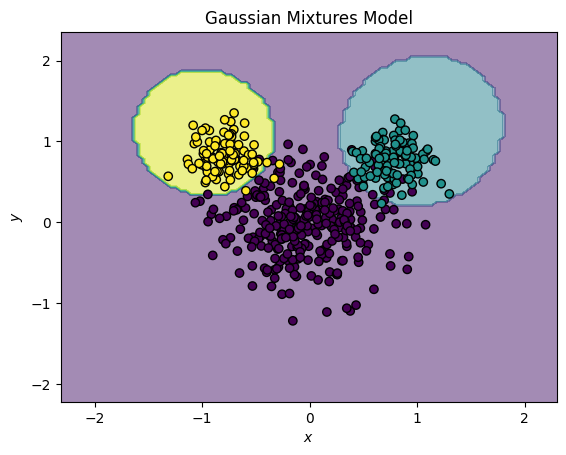

In [ ]:
gm_model = GaussianMixture(n_components=3, covariance_type='full', random_state=2025).fit(data_X)
disp = DecisionBoundaryDisplay.from_estimator(
    gm_model, data_X, response_method="predict",
    xlabel='$x$', ylabel='$y$', alpha=0.5)
disp.ax_.scatter(data_X[:, 0], data_X[:, 1], c=class_X, edgecolor="k")
disp.ax_.set_title("Gaussian Mixtures Model")
plt.show()

GMM model allows for geometrically complex decision boundaries (more complex than KMeans and KMedoids - we'll see it in a while) and it performs very well on the *mouse* dataset. What is not clear is the fact that the upper left and upper right corners of the image should be classified as the purple class. Intuitively, the closest clusters are yellow and blue, respectively - and these could have been guessed as the most probable clusters. In case of this particular dataset it is not much of a problem, because the probability of getting a point in the corners is negligible, so it doesn't impact the performance of the model. It is not obvious whether such behavior could impact (and if so, to what extent) model performance on different datasets.

On the other hand, corner points assignment might be a result of low variance in yellow and blue clusters and at the same time much higher variance in the purple one. It is possible that when we see a point in one of the upper corners, it is indeed more probable that it was generated by "purple part of the mouse" than by the other two parts - due to more variance in the former.

### K-Means model with decision boundaries

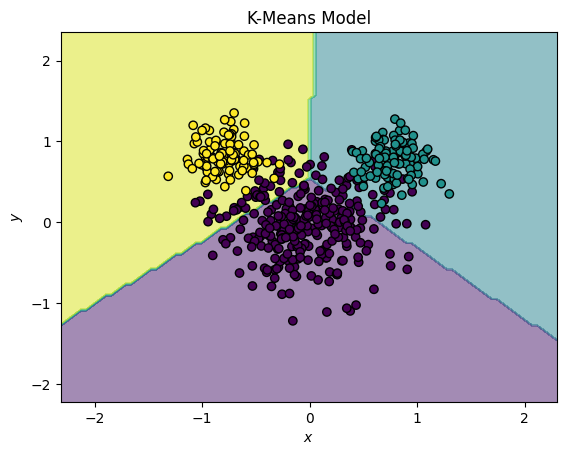

In [ ]:
kmeans_model = KMeans(n_clusters=3, n_init=1000, random_state=2025).fit(data_X)
disp = DecisionBoundaryDisplay.from_estimator(
    kmeans_model, data_X, response_method="predict",
    xlabel='$x$', ylabel='$y$', alpha=0.5)
disp.ax_.scatter(data_X[:, 0], data_X[:, 1], c=class_X, edgecolor="k")
disp.ax_.set_title("K-Means Model")
plt.show()

K-Means model comes up with more intuitive, linear decision boundaries. As we have underlined in the GMM part, the intuition is that the points in the top corners should be classified as beloning to the nearest classes (yellow and blue) - we can see that it happens here.

On the other hand, the model seems to have troubles with correctly classifying the points at the junction of yellow and purple classes. We can see a significant "cloud" of purple points, that are not mixed with yellow points and still classified as belonging to the yellow class. This was not the case in GMM models, where we didn't see such misclassified "clouds".

### K-Medoids with decision boundaries

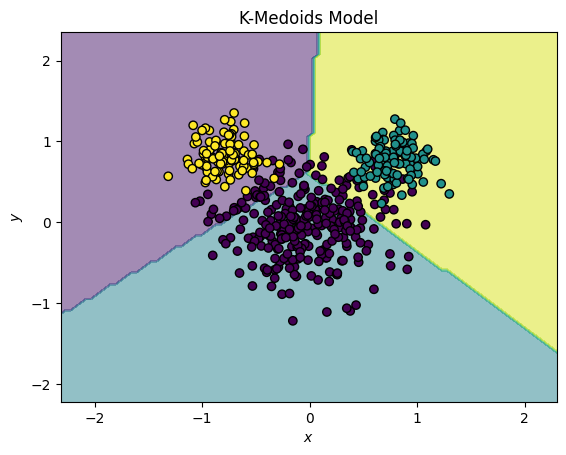

In [ ]:
kmed_model = KMedoids(n_clusters=3, random_state=2025).fit(data_X)
disp = DecisionBoundaryDisplay.from_estimator(
    kmed_model, data_X, response_method="predict",
    xlabel='$x$', ylabel='$y$', alpha=0.5)
disp.ax_.scatter(data_X[:, 0], data_X[:, 1], c=class_X, edgecolor="k")
disp.ax_.set_title("K-Medoids Model")
plt.show()

After having elaborated on the performance of K-Means model, there is not much more to say in K-Medoids. The overall performance - decision boundaries, linearity, corners, junction "datapoint clouds" misclassification - remains very similar (or even the same) as in K-Means.

# Secondary question

## Generating data

First, we'll generate some 3D data with $4$ clusters. After that we'll forget about how many classes we had acually generated, try some methods of choosing the proper number of clusters and compare the results with the "ground truth".

In [ ]:
np.random.seed(2025)

# 1) 400 points from N([0, 0, 0], [[0.16, 0, 0], [0, 0.16, 0], [0, 0, 0.16]])
mean1 = np.array([0.0, 0.0, 0.0])
cov1 = np.array([[0.16, 0.0, 0.0],
                 [0.0,  0.16, 0.0],
                 [0.0,  0.0,  0.16]])
data1 = np.hstack([np.random.multivariate_normal(mean1, cov1, 400), np.ones((400, 1))])

# 2) 400 points from N([1.0, 0.8, 0.8], [[0.04, 0, 0], [0, 0.1, 0], [0, 0, 0.2]])
mean2 = np.array([1.0, 0.8, 0.8])
cov2 = np.array([[0.04, 0.0, 0.0],
                 [0.0,  0.1, 0.0],
                 [0.0,  0.0, 0.2]])
data2 = np.hstack([np.random.multivariate_normal(mean2, cov2, 400), 2*np.ones((400, 1))])

# 3) 500 points from N([-0.8, 1.0, 0], [[0.04, 0, 0],[0, 0.04, 0],[0, 0, 0.04]])
mean3 = np.array([-0.8, 1.0, 0.0])
cov3 = np.array([[0.04, 0.0, 0.0],
                 [0.0,  0.04, 0.0],
                 [0.0,  0.0,  0.04]])
data3 = np.hstack([np.random.multivariate_normal(mean3, cov3, 500), 3*np.ones((500, 1))])

# 4) 200 points from N([0, 0.5, -0.8], [[0.02, 0, 0],[0, 0.09, 0],[0, 0, 0.04]])
mean4 = np.array([0.0, 0.5, -0.8])
cov4 = np.array([[0.02, 0.0, 0.0],
                 [0.0,  0.09, 0.0],
                 [0.0,  0.0,  0.04]])
data4 = np.hstack([np.random.multivariate_normal(mean4, cov4, 200), 4*np.ones((200, 1))])

# Combine all data
data_X = np.vstack([data1, data2, data3, data4])[:, :3] # data points
class_X = np.vstack([data1, data2, data3, data4])[:, 3] # class labels
class_names = ['class_1', 'class_2', 'class_3', 'class_4']
N, d = data_X.shape  # should be (1500, 3)
N, d

(1500, 3)

We can visualize the dataset

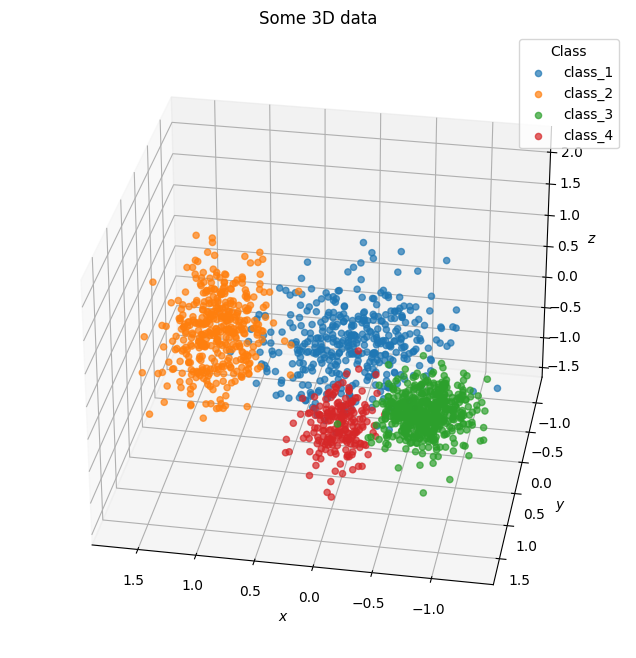

In [ ]:
# 3d-plot the PCA results with color coding by wine class
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

for i, class_name in enumerate(class_names):
    ax.scatter(data_X[class_X==i+1, 0], data_X[class_X==i+1, 1], data_X[class_X==i+1, 2], label=class_name, alpha=0.7)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title("Some 3D data")
ax.legend(title="Class")
ax.grid(True)

ax.view_init(30, 100)
plt.show()


## Clustering
We'll stick to K-Means model for the sake of simplicity. Let's explore some basic clustering performance metrics:

In [ ]:
from sklearn import metrics

First: clustering with the true number of clusters.

In [ ]:
kmeans_model = KMeans(n_clusters=4, n_init=1000, random_state=2025).fit(data_X)
class_predicted = kmeans_model.predict(data_X)
labels = kmeans_model.labels_

print("Number of clusters: 4")

hs = metrics.homogeneity_score(class_X, class_predicted)
print(f"Homogeneity score: {hs:.4f}")

cs = metrics.completeness_score(class_X, class_predicted)
print(f"Completeness score: {cs:.4f}")

vms = metrics.v_measure_score(class_X, class_predicted)
print(f"V-measure score: {vms:.4f}")

ss = metrics.silhouette_score(data_X, labels, metric='euclidean')
print(f"Silhouette score: {ss:.4f}")

Number of clusters: 4
Homogeneity score: 0.8264
Completeness score: 0.8196
V-measure score: 0.8230
Silhouette score: 0.5052


In [ ]:
HS = []
CS = []
VMS = []
SS = []

n_clusters_lst = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in n_clusters_lst:
    km_model = KMeans(n_clusters=n_clusters, n_init=500, random_state=2025).fit(data_X)
    class_predicted = km_model.predict(data_X)
    labels = km_model.labels_

    print(f"\nNumber of clusters: {n_clusters}")

    hs = metrics.homogeneity_score(class_X, class_predicted)
    HS.append(hs)
    print(f"\tHomogeneity score: {hs:.4f}")

    cs = metrics.completeness_score(class_X, class_predicted)
    CS.append(cs)
    print(f"\tCompleteness score: {cs:.4f}")

    vms = metrics.v_measure_score(class_X, class_predicted)
    VMS.append(vms)
    print(f"\tV-measure score: {vms:.4f}")

    ss = metrics.silhouette_score(data_X, labels, metric='euclidean')
    SS.append(ss)
    print(f"\tSilhouette score: {ss:.4f}")


Number of clusters: 2
	Homogeneity score: 0.3857
	Completeness score: 0.8522
	V-measure score: 0.5310
	Silhouette score: 0.4756

Number of clusters: 3
	Homogeneity score: 0.7071
	Completeness score: 0.8691
	V-measure score: 0.7798
	Silhouette score: 0.4888

Number of clusters: 4
	Homogeneity score: 0.8264
	Completeness score: 0.8196
	V-measure score: 0.8230
	Silhouette score: 0.5052

Number of clusters: 5
	Homogeneity score: 0.8363
	Completeness score: 0.7264
	V-measure score: 0.7775
	Silhouette score: 0.4480

Number of clusters: 6
	Homogeneity score: 0.8530
	Completeness score: 0.6763
	V-measure score: 0.7544
	Silhouette score: 0.4157

Number of clusters: 7
	Homogeneity score: 0.8715
	Completeness score: 0.6527
	V-measure score: 0.7464
	Silhouette score: 0.4063

Number of clusters: 8
	Homogeneity score: 0.8702
	Completeness score: 0.6142
	V-measure score: 0.7201
	Silhouette score: 0.3951

Number of clusters: 9
	Homogeneity score: 0.8631
	Completeness score: 0.5425
	V-measure score: 0

[]

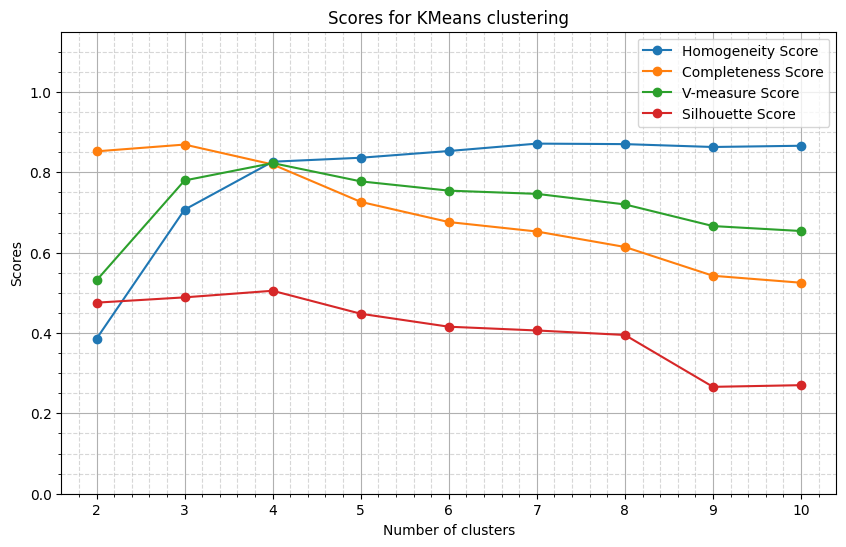

In [ ]:
# plot the scores on one subplot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(n_clusters_lst, HS, label='Homogeneity Score', marker='o')
ax.plot(n_clusters_lst, CS, label='Completeness Score', marker='o')
ax.plot(n_clusters_lst, VMS, label='V-measure Score', marker='o')
ax.plot(n_clusters_lst, SS, label='Silhouette Score', marker='o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Scores')
ax.set_ylim([0, 1.15])
ax.set_title('Scores for KMeans clustering')

ax.grid(True, 'major', linestyle='-')
ax.grid(True, 'minor', linestyle='--', alpha=0.5)
ax.minorticks_on()

ax.legend(loc='upper right')

plt.plot()

We can quickly describe the scores used. We start off by defining two main aims of good clustering:
- **homogeneity**: each cluster contains only members of a single class.
- **completeness**: all members of a given class are assigned to the same cluster.

There turns out to be some trade-off between these two, so we can define a third metric:
- **V-measure**: harmonic mean of the aforementioned scores.

We can also take into account **silhouette score**, which aims to assess the balance between cluster compactness and separation. It is then normalized and ranges between $-1$ and $1$:

- $s(i) \approx 1$: The point is **well-clustered**, meaning it is close to points in its own cluster and far from points in other clusters.
- $s(i) \approx 0$: The point is on or **near the boundary between clusters**.
- $s(i) \approx -1$: The point is likely **misclassified**, as it is closer to a different cluster than to the cluster it was assigned.

The overall silhouette score for the clustering is the mean silhouette value across all points:

$$ S = \frac{1}{n} \sum_{i=1}^n s(i) $$

Values close to $1$ indicate well-separated and compact clusters, while values near $0$ or negative suggest overlapping clusters.

[Source: our lab notes]

As we can see from the plot, the best scores are obtained for $4$ clusters, which is a correct guess by the procedure - it works! (At least on this particular dataset...)